# Vanilla Transformers

Transformer architectures are very dominant in both research and industry now-a-days. With every passing year we are witnessing it's power. It's better to focus on Transformers than on yesterday's technology - LSTM RNNs.

Here we shall understand concepts like:
- What went wrong with Seq2Seq Models?
- What is Attention Mechanism?
- Understand the complete transformer architecture (with code)

## Issues in Seq2Seq Models

Before Transformers, RNNs dominated this field (It treated sequences sequentially to keep the order of the sentence in place).


**What are sequences?**
"Time-varying data"

**What is a Sequence-to-Sequence Model?**
![Seq2Seq](https://theaisummer.com/static/cd814b80c90e3ce6bef8a52b690d3eb6/d5c6f/seq2seq.png)
The encoder and decoder are nothing more than stacked RNN layers, such as LSTM and GRU. The goal is to transform an input sequence (source) to a new one (target). Input sequence can be anything from pixels to texts. Input and Output sequences can be of the same or arbitrary length. 

The encoder processes the input and produces one compact representation, called z, from all the input timesteps. 
![Encoder](https://theaisummer.com/static/70d8d1007f46ea9628842641d3eaa8f0/bb3ba/encoder.png)

On the other hand, the decoder receives the context vector z and generates the output sequence.

![Decoder](https://theaisummer.com/static/3aeb4bd622da8741ef66770055179d6d/ae77d/decoder.png)

**What went wrong with RNNs based Seq2Seq Models?**

1. **Bottleneck Problem**: Theoretically, the vector z needs to capture all the information about the source sentence. But practically, the intermediate representation z cannot encode information from all the input timesteps. RNN’s tend to forget information from timesteps that are far behind. Eventually, the system pays more attention to the last parts of the sequence.
![Timesteps](https://theaisummer.com/static/344dcefead207723ee714f9a6c52be8b/ae694/scope-per-senquence-length.png)

2. **Vanishing gradient problem**: A well known problem in ML.
![Vanishing Gradient](https://theaisummer.com/static/e612ddf05fe84a215d99da9fb425d05b/58fee/memorization-rnns.png)

3. **LSTMs are difficult to comprehend.**



## Attention Mechanism

**What is attention?**

"Memory is attention through time."


**Different Types of Attention?**
- Implicit: Very deep neural networks already learn a form of implicit attention.
- Explicit: By asking the network to ‘weigh’ its sensitivity to the input based on memory from previous inputs, we introduce explicit attention. From now on, we will refer to this as attention.


**How do we compute attention?**

Consider RNN based Seq2Seq with Attention Mechanism. Here we add an attention neural net in decoder for passing an "attentive" encoded sequence. 

![Attention Seq2Seq RNN](https://theaisummer.com/static/c657cd22c2d5501071dab630b3b91043/58213/seq2seq-attention.png)

- Input 1: previous state in the decoder as $y_{i-1}$
- Input 2: the the hidden state of encoder **h** = $h_{1}, h_{2},.., h_{n}$ 

All we need is a score that describes the relationship between the two states and captures how “aligned” they are. Defining a scalar score (weighting) between the hidden state of the decoder and all the hidden states of the encoder. For now let's compute attention as the dot product between the two states (Luong).

$e_{ij} = attention_{net} (y_{i-1}, h_{j})$

To have more confident predictions let's convert scores into its softmax values. 

$\alpha_{ij} = \frac{exp(e_{ij})}{\sum_k exp(e_{ik})} $

Finally, "attentive" encoded sequence is calculated as

$z_i = \sum_j \alpha_{ij} h_{j}$

So attention is defined as the weighted average of values, where weighting is a learned function! Thus, we have a smooth differentiable function that we can train end to end with our favorite backpropagation.

Different Techniques to calculate scores:
![Calculate Scores](https://theaisummer.com/static/2dd2a106a1c626f5cbae0d134c7bf83a/1ac29/attention-calculation.png)

**How Attention solved these issues?**

>“Intuitively, this implements a mechanism of attention in the decoder. The decoder decides parts of the source sentence to pay attention to. By letting the decoder have an attention mechanism, we relieve the encoder from the burden of having to encode all information in the source sentence into a fixed-length vector. With this new approach, the information can be spread throughout the sequence of annotations, which can be selectively retrieved by the decoder accordingly." - Bahdanau et al.

The core idea is that the context vector Z should have access to all parts of the input sequence instead of just the last one. We look at all the different words at the same time and learn to “pay attention“ to the correct ones depending on the task at hand. In local attention, we consider only a subset of the input units/tokens, instead of computing attention over the entire input sequence (global attention).

Apart from solving the issues like vanishing gradient and bottleneck problem, these models are explainable. By inspecting the distribution of attention weights, we can gain insights into the behavior of the model, as well as to understand its limitations.



## [The Transformer](https://arxiv.org/pdf/1706.03762.pdf)

**Model Architecture**

![Transformer Image](https://mchromiak.github.io/articles/2017/Sep/12/Transformer-Attention-is-all-you-need/img/encoder.png)


*Attention has replaced recurrence (RNNs), which requires an increasing number of operations as the distance between two words increases. The attention mechanism is a "word-to-word" operation. The attention mechanism will find how each word is related to all other words in a sequence, including the word being analyzed itself.*


### Encoder Stack

![Encoder](https://trungtran.io/wp-content/uploads/2019/04/encoder.png)

The original encoder layer structure remains the same for all of the N=6 layers of the Transformer model. Each layer contains two main sub-layers: *a multi-headed attention mechanism* and *a fully connected position-wise feedforward network*. The normalized output of each layer is : 

**LayerNormalization (x + Sublayer(x))** 

Though the structure of each of the N=6 layers of the encoder is identical, the content of each layer is not strictly identical to the previous layer. For ex: the multi-head attention mechanisms perform the same functions from layer 1 to 6. However, they do not perform the same tasks. Each layer learns from the previous layer and explores different ways of associating the tokens in the sequence. It looks for various associations of words, just like how we look for different associations of letters and words when we solve a crossword puzzle. 

The output of every sub-layer of the model has a constant dimension, including the embedding layer and the residual connections. This dimension is $d_{model}$ and can be set to another value depending on your goals. In the original Transformer architecture, $d_{model}$ = 512. 

$d_{model}$ has a powerful consequence. *Practically all the key operations are dot products. The dimensions remain stable, which reduces the number of operations to calculate, reduces machine consumption, and makes it easier to trace the information as it flows through the model.*


#### Input Embedding

So unlike a sequence of elements in RNNs' input, we consider a set of words for transformers where the order is irrelevant.

The input embedding sub-layer converts the input tokens to vectors of dimension $d_{model}$ = 512 using learned embeddings in the original Transformer model. The Transformer's subsequent layers do not start empty-handed. They have learned word embeddings that already provide information on how the words can be associated. Ideally, an embedding captures the semantics of the input by placing semantically similar inputs close together in the embedding space.

Let's take an example using skip-gram architecture of the word2vec embedding.

In [1]:
!pip install --upgrade gensim
import torch
import nltk
nltk.download('punkt')

     |████████████████████████████████| 24.1 MB 59.8 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
import math
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize 
import gensim 
from gensim.models import Word2Vec 
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action = 'ignore')

Let's consider the sentence - *The **black** cat sat on the couch and the **brown** dog slept on the rug.*

We shall calculate the cosine similarity between words highlighted.

In [11]:
# Open ‘text.txt’ file containing the sentence
sample = open("/content/drive/MyDrive/Colab Notebooks/Varieties/Transformers/text.txt", "r") 
s = sample.read() 

# processing escape characters 
fo = s.replace("\n", " ")
f = fo.replace(".", ". ")

In [12]:
data = [] 

# sentence parsing 
for i in sent_tokenize(f): 
	temp = [] 
	# tokenize the sentence into words 
	for j in word_tokenize(i): 
		temp.append(j.lower()) 
	data.append(temp)
 
print(data[0])

['the', 'black', 'cat', 'sat', 'on', 'the', 'couch', 'and', 'the', 'brown', 'dog', 'slept', 'on', 'the', 'rug', '.']


In [19]:
# Creating Skip Gram model 
#help(gensim.models.Word2Vec)
modelw2v = gensim.models.Word2Vec(data, min_count = 1, vector_size = 512, window = 5, sg = 1)

# words
word1 = 'black'
word2 = 'brown'

# word positions
pos1 = 2 
pos2 = 10

# embeddings
a = modelw2v.wv[word1]
b = modelw2v.wv[word2]


print(f"512-d embedding for word {word1}: {a}")
print(f"512-d embedding for word {word2}: {b}")

512-d embedding for word black: [-3.58195864e-02 -6.92549795e-02 -2.16294508e-02  4.13123034e-02
 -2.18446669e-03  6.77184761e-03  3.15587893e-02 -1.87066346e-02
 -5.56072313e-03 -1.01233898e-02 -1.36737060e-03 -8.93861055e-03
  8.87330156e-04 -2.26209126e-02 -1.80378873e-02 -3.38410735e-02
  2.49547120e-02  9.46539119e-02 -4.74620052e-02 -2.05913503e-02
  3.09508555e-02 -3.47310826e-02  8.97751600e-02  2.08360720e-02
 -1.77241229e-02  2.91945110e-03  1.03276018e-02  4.47897352e-02
  2.01612785e-02 -9.10799652e-02 -1.26987183e-02  5.68429381e-02
  2.64868159e-02 -8.48975556e-04 -2.12238915e-02 -7.51495780e-03
  5.26122823e-02 -2.55073532e-02  1.98398270e-02 -1.43961441e-02
 -4.66253869e-02  8.32846463e-02 -6.04018234e-02 -2.52942052e-02
  4.67037298e-02 -9.17200558e-03 -1.66889969e-02  6.17212616e-03
  6.32612929e-02  8.47871006e-02 -2.00561900e-02  6.03558030e-03
  5.20686172e-02  9.21663344e-02 -4.82816696e-02 -8.60160124e-03
 -4.18979581e-03 -5.72672449e-02  1.10203037e-02  7.024467

In [20]:
# compute cosine similarity
# For those who don't know the maths behind
#dot = np.dot(a, b)
#norma = np.linalg.norm(a)
#normb = np.linalg.norm(b)
#cos = dot / (norma * normb)
#print(cos)

aa = a.reshape(1,512) 
ba = b.reshape(1,512)
cos_lib = cosine_similarity(aa, ba)
print(f"word similarity: {cos_lib}")

word similarity: [[0.99932337]]


However, a big chunk of information is missing because **no additional vector or information indicates a word's position in a set.** The designers of the Transformer came up with yet another innovative feature: positional encoding.

#### Positional Encoding

The idea is to add a positional encoding value to the input embedding instead of having additional vectors to describe the position of a token in a sequence. 
Our problem is to find a way to add a value to the word embedding of each word so that it has that information. The designers found a clever way to use a unit sphere to represent positional encoding with sine and cosine values that will thus remain small but very useful. 

Authors provide sine and cosine functions so that we can generate different frequencies for the positional encoding (PE) for each position and each dimension i of the $d_{model}$ = 512 of the word embedding vector:

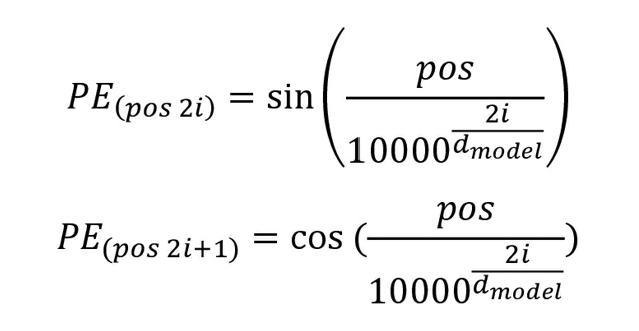

The sine function will be applied to the even numbers and the cosine function to the odd numbers.

In [21]:
# copy of word embeddings
pe1 = aa.copy()
pe2 = ba.copy()

d_model=512

for i in range(0, d_model, 2):
    pe1[0][i] = math.sin(pos1 / (10000 ** ((2 * i)/d_model)))
    pe1[0][i+1] = math.cos(pos1 / (10000 ** ((2 * i)/d_model)))
    pe2[0][i] = math.sin(pos2 / (10000 ** ((2 * i)/d_model)))            
    pe2[0][i+1] = math.cos(pos2 / (10000 ** ((2 * i)/d_model)))

cos_lib = cosine_similarity(pe1, pe2)
print(f"positional similarity: {cos_lib}")

positional similarity: [[0.8600013]]


The positional encoding has taken these words apart as the encoding of the position shows a lower similarity value than the word embedding similarity. 

The authors of the Transformer added the positional encoding vector to the word embedding vector. So that we don't lose the information of the word embedding layer in the subsequent layers, its multiplied with an arbitrary constant value.

**positional encoding(word) = word embedding(word) * arbitrary constant + positional vector(word)**

The positional encoding of each word now contains the initial word embedding information and the positional encoding values.



In [22]:
# copy of word embeddings
paa = aa.copy()
pba = ba.copy()

for i in range(0, d_model, 2):
    paa[0][i] = (paa[0][i] * math.sqrt(d_model)) + pe1[0][i]
    paa[0][i+1] = (paa[0][i+1] * math.sqrt(d_model)) + pe1[0][i+1]
    pba[0][i] = (pba[0][i] * math.sqrt(d_model)) + pe2[0][i]
    pba[0][i+1] = (pba[0][i+1] * math.sqrt(d_model)) + pe2[0][i+1]

cos_lib = cosine_similarity(paa, pba)
print(f"positional encoding similarity: {cos_lib}")

positional encoding similarity: [[0.95315605]]


#### Sub-layer 1: Multi-head attention

The multi-head attention sub-layer contains eight heads and is followed by post-layer normalization, which will add residual connections to the output of the sub-layer and normalize it.

**The architecture of multi-head attention**

**Input**: For the first layer of the encoder stack is a 512-dim vector that contains the embedding and the positional encoding of each word. *The next layers of the stack do not start these operations over.*

Each word is mapped to all the other words to determine how it fits in a sequence. However, we would only get one point of view at a time by analyzing the sequence with one $d_{model}$ block. Furthermore, it would take quite some calculation time to find other perspectives. 

A better way is to divide the $d_{model}$ = 512 dimensions of each word $x_n$ of x (all of the words of a sequence) into 8 $d_k$ = 64 dimensions. We then can run the 8 "heads" in parallel to speed up the training and obtain 8 different representation subspaces of how each word relates to another.

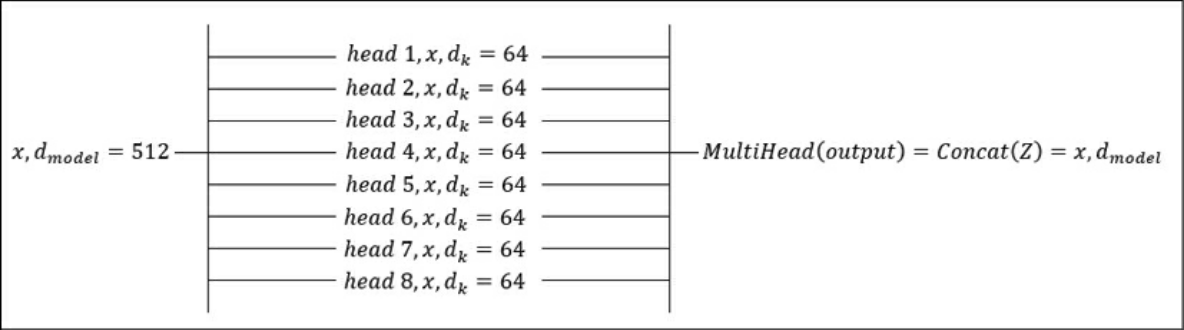

The output of each head is a matrix $z_i$ with a shape of x*$d_k$. The output of a multi-attention head is Z defined as: Z = ($z_0, z_1, z_2, z_3, z_4, z_5, z_6, z_7)$. 
Before exiting the multi-head attention sub-layer, the elements of Z are concatenated: 

**MultiHead(output) = Concat($z_0, z_1, z_2, z_3, z_4, z_5, z_6, z_7$) = x, $d_{model}$**

Inside each head $h_n$ of the attention mechanism, each word vector has three representations: 

- A query vector (Q) that has a dimension of $d_q$ = 64, which is activated and trained when a word vector $x_n$ seeks all of the key-value pairs of the other word vectors, including itself in self-attention 
- A key vector (K) that has a dimension of $d_k$ = 64, which will be trained to provide an attention value
- A value vector (V) that has a dimension of $d_v$ = 64, which will be trained to provide another attention value 

This concept comes from Information Retrieval Systems. Instead of choosing where to look according to the position within a sequence, we now attend to the content that we wanna look at! So, by moving one step forward, we further split the data into key-value pairs. We use the keys to define the attention weights to look at the data and the values as the information that we will actually get. By defining a degree of similarity (weight) between our representations we can weight our query. We can associate the similarity between vectors that represent anything by calculating the scaled dot product, namely the cosine of the angle.

**Attention is defined as "Scaled Dot-Product Attention," which is represented in the following equation**

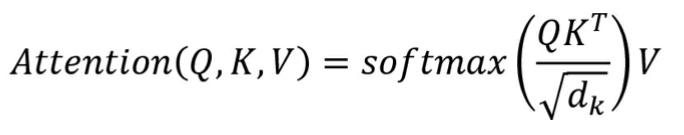

All the vectors Q,K,V have the same dimension making it relatively simple to use a scaled dot product to obtain the self-attention values for each head and then concatenate the output Z of the 8 heads. 

**Self-attention enables us to find correlations between different words of the input indicating the syntactic and contextual structure of the sentence.**


Let's get our hands dirty in Python to illustrate the architecture we just explored in order to visualize the model in code and show it with intermediate images.

![selfattn](https://nbviewer.org/github/jamescalam/transformers/blob/main/assets/images/bidirectional_attention.png)


**Step 1: Represent the input**

x contains 3 inputs with 4 dimensions each instead of 512. *(The input of the attention mechanism we are building is scaled down to $d_{model}$ = 4 instead of $d_{model}$ = 512. Its easier to visualize.)*

In [23]:
import numpy as np
from scipy.special import softmax

In [35]:
print("Step 1: Input : 3 inputs, d_model=4 \n")

x =np.array([[1.0, 0.0, 1.0, 0.0],   # Input 1
             [0.0, 2.0, 0.0, 2.0],   # Input 2
             [1.0, 1.0, 1.0, 1.0]])  # Input 3
print(x)

Step 1: Input : 3 inputs, d_model=4 

[[1. 0. 1. 0.]
 [0. 2. 0. 2.]
 [1. 1. 1. 1.]]


**Step 2: Initializing the weight matrices**

Each input has 3 weight matrices: 
- $Q_w$ to train the queries 
- $K_w$ to train the keys 
- $V_w$ to train the values 

These 3 weight matrices will be applied to all the inputs in this model. The dimensions are scaled down to 3*4 weight matrices to be able to visualize the intermediate results more easily and perform dot products with the input x.

In [25]:
print("Step 2: weights 3 dimensions x d_model=4")

print("\n w_query")
w_query =np.array([[1, 0, 1],
                   [1, 0, 0],
                   [0, 0, 1],
                   [0, 1, 1]])
print(w_query)

print("\n w_key")
w_key =np.array([[0, 0, 1],
                 [1, 1, 0],
                 [0, 1, 0],
                 [1, 1, 0]])
print(w_key)

print("\n w_value")
w_value = np.array([[0, 2, 0],
                    [0, 3, 0],
                    [1, 0, 3],
                    [1, 1, 0]])
print(w_value)

Step 2: weights 3 dimensions x d_model=4

 w_query
[[1 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 1]]

 w_key
[[0 0 1]
 [1 1 0]
 [0 1 0]
 [1 1 0]]

 w_value
[[0 2 0]
 [0 3 0]
 [1 0 3]
 [1 1 0]]


**Step 3: Matrix multiplication to obtain Q, K, V**

We will now multiply the input vectors by the weight matrices to obtain a query, key, and value vector for each input. *In this model, we will assume that there is one w_query, w_key, and w_value weight matrix for all inputs.*

In [26]:
print("Step 3: Matrix multiplication to obtain Q,K,V")

print("\n Queries: x * w_query")
Q = np.matmul(x,w_query)
print(Q)

print("\n Keys: x * w_key")
K=np.matmul(x,w_key)
print(K)

print("\n Values: x * w_value")
V=np.matmul(x,w_value)
print(V)

Step 3: Matrix multiplication to obtain Q,K,V

 Queries: x * w_query
[[1. 0. 2.]
 [2. 2. 2.]
 [2. 1. 3.]]

 Keys: x * w_key
[[0. 1. 1.]
 [4. 4. 0.]
 [2. 3. 1.]]

 Values: x * w_value
[[1. 2. 3.]
 [2. 8. 0.]
 [2. 6. 3.]]


**Step 4: Scaled attention scores**


In [27]:
print("Step 4: Scaled Attention Scores \n")
k_d=1   #square root of k_d=3 rounded down to 1 for this example
attention_scores = (Q @ K.transpose())/k_d
print(attention_scores)

Step 4: Scaled Attention Scores 

[[ 2.  4.  4.]
 [ 4. 16. 12.]
 [ 4. 12. 10.]]


**Step 5: Scaled softmax attention scores for each vector**


In [28]:
print("Step 5: Scaled softmax attention_scores for each vector \n")
attention_scores[0]=softmax(attention_scores[0])
attention_scores[1]=softmax(attention_scores[1])
attention_scores[2]=softmax(attention_scores[2])
print(attention_scores[0])
print(attention_scores[1])
print(attention_scores[2])

Step 5: Scaled softmax attention_scores for each vector 

[0.06337894 0.46831053 0.46831053]
[6.03366485e-06 9.82007865e-01 1.79861014e-02]
[2.95387223e-04 8.80536902e-01 1.19167711e-01]


**Step 6: The final attention representations**

To obtain Attention (Q,K,V) for x1, we multiply the intermediate attention score by the 3 value vectors one by one to zoom down into the inner workings of the equation:

In [30]:
print("Step 6: attention value obtained")
print(V[0])
print(V[1])
print(V[2])

print("\n Attention 1")
attention1=attention_scores[0].reshape(-1,1)
attention1=attention_scores[0][0]*V[0]
print(attention1)

print("\n Attention 2")
attention2=attention_scores[0][1]*V[1]
print(attention2)

print("\n Attention 3")
attention3=attention_scores[0][2]*V[2]
print(attention3)

Step 6: attention value obtained
[1. 2. 3.]
[2. 8. 0.]
[2. 6. 3.]

 Attention 1
[0.06337894 0.12675788 0.19013681]

 Attention 2
[0.93662106 3.74648425 0.        ]

 Attention 3
[0.93662106 2.80986319 1.40493159]


**Step 7: Summing up the attention values**

The 3 attention values of input #1 obtained will now be summed to obtain the first line of the output matrix:


In [31]:
print("Step 7: summed the results to create the first line of the output matrix")
attention_input1 = attention1 + attention2 + attention3
print(attention_input1)

Step 7: summed the results to create the first line of the output matrix
[1.93662106 6.68310531 1.59506841]


We have completed the steps for input #1. We now need to add the results of all the inputs to the model.

![multiheadattn](https://nbviewer.org/github/jamescalam/transformers/blob/main/assets/images/multihead_attention.png)

**Step 8: Steps 1 to 7 for all the inputs**

The Transformer can now produce the attention values of input #2 and input #3 using the same method described from Step 1 to Step 7 for one attention head. 

From this step onward, we will assume we have 3 attention values with learned weights with dmodel = 64. We now want to see what the original dimensions look like when they reach the sub-layer's output. 

We have seen the attention representation process in detail with a small model. Let's go directly to the result and assume we have generated the 3 attention representations with a dimension of dmodel = 64:


In [32]:
print("Step 8: Step 1 to 7 for inputs 1 to 3 \n")
#We assume we have 3 results with learned weights (they were not trained in this example)
#We assume we are implementing the original Transformer paper. We will have 3 results of 64 dimensions each
attention_head1 = np.random.random((3, 64))
print(attention_head1)

Step 8: Step 1 to 7 for inputs 1 to 3 

[[5.41372496e-01 1.92340439e-01 1.65695460e-01 2.81819700e-01
  9.75211103e-01 6.59861491e-01 7.91547381e-01 9.30417816e-01
  5.36677487e-01 1.31965565e-01 7.32588181e-01 7.30021713e-01
  1.37678592e-01 5.00586219e-01 4.46693267e-01 2.22252817e-01
  9.58849654e-01 8.18504179e-01 1.08616492e-01 1.25990880e-04
  1.63155056e-01 4.27085559e-01 9.06510401e-01 7.45888944e-01
  5.27296024e-01 1.77862145e-01 5.50427453e-02 7.18828089e-01
  8.15625797e-01 2.30020447e-01 7.28851172e-01 9.64193547e-01
  4.50986724e-01 3.49277414e-02 7.85841622e-01 2.83914349e-01
  6.08906638e-01 5.98900989e-01 7.75231943e-02 9.40418413e-01
  9.42827126e-01 3.44452026e-01 9.00870429e-01 7.54851825e-01
  3.87738368e-01 4.90176476e-01 1.05516359e-01 4.49681960e-01
  5.31916044e-01 4.09560975e-01 9.06598064e-01 1.45409913e-01
  3.05356584e-01 1.71883815e-01 6.42122330e-01 9.72409962e-01
  5.60211821e-01 4.47055746e-01 3.45563987e-01 4.04350988e-01
  4.13610345e-01 4.07694583e-0

The following output displays the simulation of $z_0$, which represents the 3 output vectors of $d_{model}$ = 64 dimensions for head 1. The next step is to generate the outputs of the 8 heads to create the final output of the attention sub-layer. 

**Step 9: The output of the heads of the attention sub-layer**

We assume that we have trained the 8 heads of the attention sub-layer. The transformer now has 3 output vectors (of the 3 input vectors that are words or word pieces) of dmodel = 64 dimensions each:


In [33]:
print("Step 9: We assume we have trained the 8 heads of the attention sub-layer \n")
z0h1=np.random.random((3, 64))
z1h2=np.random.random((3, 64))
z2h3=np.random.random((3, 64))
z3h4=np.random.random((3, 64))
z4h5=np.random.random((3, 64))
z5h6=np.random.random((3, 64))
z6h7=np.random.random((3, 64))
z7h8=np.random.random((3, 64))
print("shape of one head", z0h1.shape,", dimension of 8 heads", 64*8)

Step 9: We assume we have trained the 8 heads of the attention sub-layer 

shape of one head (3, 64) , dimension of 8 heads 512


The Transformer will now concatenate the 8 elements of Z for the final output of the multi-head attention sub-layer.

**Step 10: Concatenation of the output of the heads**

Note that Z is multiplied by W0, which is a weight matrix that is trained as well. In this model, we will assume W0 is trained and integrated into the concatenation function.

In [34]:
print("Step 10: Concatenation of heads 1 to 8 to obtain the original 8x64=512 output dimension of the model\n")
output_attention=np.hstack((z0h1,z1h2,z2h3,z3h4,z4h5,z5h6,z6h7,z7h8))
print(output_attention)

Step 10: Concatenation of heads 1 to 8 to obtain the original 8x64=512 output dimension of the model

[[0.49342082 0.80439665 0.38223294 ... 0.43260595 0.13906076 0.67078238]
 [0.8389664  0.32112108 0.76446905 ... 0.82682026 0.45728722 0.54304572]
 [0.67369779 0.34305912 0.34287381 ... 0.56832624 0.34260119 0.13544981]]


#### Post-layer normalization

Each attention sub-layer and each feedforward sub-layer of the Transformer is followed by post-layer normalization (Post-LN). The Post-LN contains an add function and a layer normalization process. The add function processes the residual connections that come from the input of the sub-layer. The goal of the residual connections is to make sure critical information is not lost. The Post-LN or layer normalization can thus be described as follows: 

**LayerNorm(x+Sublayer(x))**

where,

$LayerNorm(v) =  \gamma \frac{v - \mu}{\sigma} + \beta$

and, $\mu$ is the mean, $\sigma$ is the std. dev., $\gamma$ is scaling parameter and $\beta$ is bias vector.


#### Sub-layer 2: Feedforward network

The input of the FFN is the $d_{model}$ = 512 output of the Post-LN of the previous sub-layer. The FFN sub-layer can be described as follows: 

- The FFNs in the encoder and decoder are fully connected. 
- The FFN is a position-wise network. Each position is processed separately and in an identical way. 
- The FFN contains two layers and applies a ReLU activation function. 
- The input and output of the FFN layers is $d_{model}$ = 512, but the inner layer is larger with $d_{ff}$ = 2048 
- The FFN can be viewed as performing two kernel size 1 convolutions.

Taking this description into account, we can describe the optimized and standardized FFN as follows: 

**FFN(x) = max(0, x*W1 + b1)W2 =b2**

The output of the FFN goes to the Post-LN, as described in the previous section. Then the output is sent to the next layer of the encoder stack and the multi-head attention layer of the decoder stack.


### Sum up: the Transformer encoder

To process a sentence we need these 3 steps:

- Word embeddings of the input sentence are computed simultaneously.

- Positional encodings are then applied to each embedding resulting in word vectors that also include positional information.

- The word vectors are passed to the first encoder block.


Each block consists of the following layers in the same order:

- A multi-head self-attention layer to find correlations between each word

- A normalization layer

- A residual connection around the previous two sublayers

- A linear layer

- A second normalization layer

- A second residual connection



### Decoder Stack

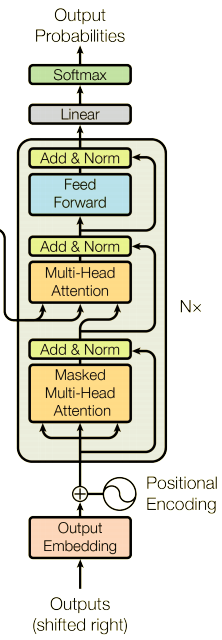

The structure of the decoder layer remains the same as the encoder for all the N=6 layers of the Transformer model. Each layer contains three sub-layers: 
- a multi-headed masked attention mechanism, 
- a multi-headed attention mechanism, 
- and a fully connected position-wise feedforward network. 

Compared to Encoder, the decoder has a third main sub-layer, which is the masked multi-head attention mechanism. In this sub-layer output, at a given position, the following words are masked so that the Transformer bases its assumptions on its inferences without seeing the rest of the sequence. That way, in this model, it cannot see future parts of the sequence.

The structure of each sub-layer and function of the decoder is similar to the encoder. We can see that the designers worked hard to create symmetrical encoder and decoder stacks. In this section, we can refer to the encoder for the same functionality when we need to. We will only focus here on the differences between the decoder and the encoder.


#### Output embedding and position encoding

The output embedding layer and position encoding function are the same as in the encoder stack. It's freshly done again. 

#### The attention layers

The Transformer is an auto-regressive model. It uses the previous output sequences as an additional input. The multi-head attention layers of the decoder use the same process as the encoder.

![maskedselfattn](https://nbviewer.org/github/jamescalam/transformers/blob/main/assets/images/self_attention.png)

However, the masked multi-head attention sub-layer 1 only lets attention apply to the positions up to and including the current position. The future words are hidden from the Transformer, and this forces it to learn how to predict.

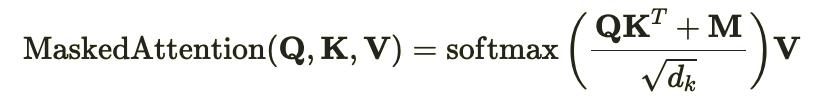

The multi-head attention sub-layer 2 also only attends to the positions up to the current position the Transformer is predicting to avoid seeing the sequence it must predict. The multi-head attention sub-layer 2 draws information from the encoder by taking encoder (K, V) into account during the dot-product attention operations. This sub-layer also draws information from the masked multi-head attention sub-layer 1 (masked attention) by also taking sub-layer 1(Q) into account during the dot-product attention operations. The decoder thus uses the trained information of the encoder.

The encoder’s output encapsulates the final embedding of the input sentence. It is like our database. So we will use the encoder output to produce the Key and Value matrices. On the other hand, the output of the Masked Multi-head attention block contains the so far generated new sentence and is represented as the Query matrix in the attention layer. Thus this works like the “search” in the database. 

The encoder-decoder attention is trained to associate the input sentence with the corresponding output word. For example in Neural Machine Translation, it will eventually determine how related each English word is with respect to the French words. This is essentially where the mapping between English and French is happening.

![selfattnecdec](https://nbviewer.org/github/jamescalam/transformers/blob/main/assets/images/dot_product_attention.png)

We can define the input of the self-attention multi-head sub-layer of a decoder as: 

**Input_Attention=(Output_decoder_sub_layer_1(Q), Output_encoder_layer(K,V))** 

A post-layer normalization process follows the masked multi-head attention sub-layer 1 as in the encoder.


#### The FFN sub-layer, the Post-LN, and the linear layer

The FFN sub-layer has the same structure as the FFN of the encoder stack. The Post-LN of the FFN works as the layer normalization of the encoder stack. The Transformer produces an output sequence of only one element at a time: Output sequence= (y1, y2, … yn). 
The linear layer produces an output sequence with a linear function that varies per model but relies on the standard method: y = w*x + b, where x and b are learned parameters. The linear layer will thus produce the next probable elements of a sequence that a softmax function will convert into a probable element. 
The decoder layer as the encoder layer will then go from layer l to layer l+1 up to the top layer of the N=6-layer transformer stack.

**Output Example**: The Transformer clearly identifies the two nouns “it” could refer to and the respective amount of attention reflects its choice in the different contexts.

![Example](https://1.bp.blogspot.com/-AVGK0ApREtk/WaiAuzddKVI/AAAAAAAAB_A/WPV5ropBU-cxrcMpqJBFHg73K9NX4vywwCLcBGAs/s640/image2.png)

**Next: Let's train a transformer**